# Module 2 Peer Review Assignment

***

## Project Description

Statements

You will be working with the following statements: 

a.    The Weight – Miles_per_Gallon(mpg) model estimates a decrease in mileage of 5.34 miles per gallon with 1 unit increase in weight, and about 75 % of the variation in percentage of Miles_per_Gallon is associated with variation in weight.

b.    The Horse_Power – Miles_per_Gallon (mpg) model estimates a decrease in mileage of 0.06 miles per gallon with 1 unit increase in horse power, and about 60% of the variation in percentage of Miles_per_Gallon is associated with variation in horse power.

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify


import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date

# import shap
# import eli5
# from IPython.display import display

#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_score, recall_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.feature_selection import f_regression, f_classif, chi2, RFE, RFECV
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import VarianceThreshold, GenericUnivariateSelect
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile

from sklearn.inspection import permutation_importance

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge


import feature_engine

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from feature_engine.selection import SelectBySingleFeaturePerformance, SelectByShuffling, RecursiveFeatureElimination
from feature_engine.selection import RecursiveFeatureAddition

# check installed version (must be >3.0)
import pycaret
#print(pycaret.__version__)
from pycaret.regression import *

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# This module lets us save our models once we fit them.
# import pickle

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Quick Data Glance

In [2]:
df = pd.read_csv("mtcars.csv")

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,Mazda RX4 Wag,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,Datsun 710,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,Hornet 4 Drive,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,Hornet Sportabout,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.dtypes.value_counts()

int64      6
float64    5
object     1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
unique,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mazda RX4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,NaN,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,NaN,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,NaN,15.43,4.00,120.83,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,NaN,19.20,6.00,196.30,123.00,3.70,3.33,17.71,0.00,0.00,4.00,2.00
75%,NaN,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,20.09,6.19,230.72,146.69,3.60,3.22,17.85,0.44,0.41,3.69,2.81
std,6.03,1.79,123.94,68.56,0.53,0.98,1.79,0.50,0.50,0.74,1.62
min,10.40,4.00,71.10,52.00,2.76,1.51,14.50,0.00,0.00,3.00,1.00
25%,15.43,4.00,120.83,96.50,3.08,2.58,16.89,0.00,0.00,3.00,2.00
50%,19.20,6.00,196.30,123.00,3.70,3.33,17.71,0.00,0.00,4.00,2.00
75%,22.80,8.00,326.00,180.00,3.92,3.61,18.90,1.00,1.00,4.00,4.00
max,33.90,8.00,472.00,335.00,4.93,5.42,22.90,1.00,1.00,5.00,8.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,model
count,32
unique,32
top,Mazda RX4
freq,1


In [9]:
df.shape

(32, 12)

In [10]:
df.columns

Index(['model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [11]:
df.drop(["model"], axis=1, inplace=True)

In [12]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.00,6,160.00,110,3.90,2.62,16.46,0,1,4,4
1,21.00,6,160.00,110,3.90,2.88,17.02,0,1,4,4
2,22.80,4,108.00,93,3.85,2.32,18.61,1,1,4,1
3,21.40,6,258.00,110,3.08,3.21,19.44,1,0,3,1
4,18.70,8,360.00,175,3.15,3.44,17.02,0,0,3,2


**=================================================================================================================**

# PyCaret

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates). 

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function. 

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models. 

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model** 
<br/>

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [13]:
s = setup(data=df, target = 'mpg', session_id = 0, fold=5, n_jobs=2)

,Description,Value
0,Session id,0
1,Target,mpg
2,Target type,Regression
3,Original data shape,"(32, 11)"
4,Transformed data shape,"(32, 11)"
5,Transformed train set shape,"(22, 11)"
6,Transformed test set shape,"(10, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [14]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,2.0731,6.9291,2.6182,0.6807,0.1212,0.1064,0.1120
dt,Decision Tree Regressor,2.2470,8.5341,2.8759,0.6746,0.1361,0.1150,0.0360
gbr,Gradient Boosting Regressor,2.0048,6.9507,2.5645,0.6538,0.1220,0.1061,0.0780
huber,Huber Regressor,2.3701,9.1024,2.9179,0.6531,0.1264,0.1151,0.0700
ridge,Ridge Regression,2.5552,9.8924,2.9379,0.6463,0.1262,0.1244,0.0400
en,Elastic Net,2.8173,10.6236,3.1596,0.6265,0.1432,0.1332,0.0620
knn,K Neighbors Regressor,2.8092,10.2743,3.1459,0.6017,0.1539,0.1447,0.0520
lasso,Lasso Regression,2.9994,11.6583,3.3134,0.5824,0.1510,0.1431,0.0440
ada,AdaBoost Regressor,2.3101,9.0947,2.9262,0.5778,0.1293,0.1138,0.0880
xgboost,Extreme Gradient Boosting,2.4203,8.7035,2.8379,0.5728,0.1283,0.1218,0.0880


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

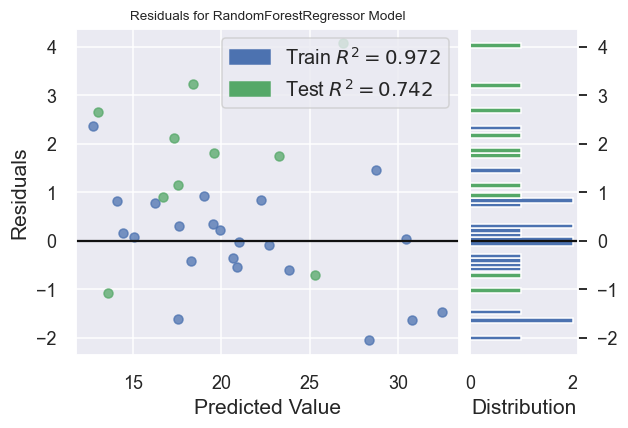

In [15]:
# plot residuals
plot_model(best, plot = 'residuals', scale=1.5)

#### Python code done by Dennis Lam